In [4]:
from sklearn.decomposition import PCA
from hdimvis.algorithms.stochastic_ntet_algo.SNeD import SNeD
from hdimvis.create_low_d_layout.LowDLayoutCreation import LowDLayoutCreation
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from hdimvis.visualise_layouts_and_metrics.plot import show_layouts, show_generation_metrics
from hdimvis.metrics.distance_measures.relative_rbf_dists import relative_rbf_dists
import numpy as np
import matplotlib.pyplot as plt

In [5]:

all_datasets_list = ['poker', 'mnist', 'bonds', 'coil20', 'rna N3k', 'airfoil', 'wine quality', 'fashion mnist'
                                                                                                'shuttle',
                     'flow cytometry']


metric_collection = {'Average quartet stress': 10}
dataset = DataFetcher().fetch_data('rna N3k')

Xld = PCA(n_components=2, whiten=False, copy=True).fit_transform(dataset.data).astype(np.float64)
Xld *= 10/np.std(Xld)

squad = SNeD(dataset=dataset, initial_layout=Xld, nesterovs_momentum=False, ntet_size=20)
layout = LowDLayoutCreation().create_layout(squad, optional_metric_collection=None, no_iters=200)

####################
Fetching the "rna N3k" dataset
####################
Dataset loaded
Dataset shape: (3000, 50)
####################
A 2D layout of the "rna N3k" dataset will be created 
using the "Stochastic N-tet Descent MDS" algorithm
####################
The HD distance measure used is: euclidean
####################
####################
No metrics will be collected during layout creation. 
To change this use the 'metric collection' parameter of the layout 
####################
All stress calculations will be performed using the euclidian norm
####################
 "N-tet" size: 20


KeyboardInterrupt: 

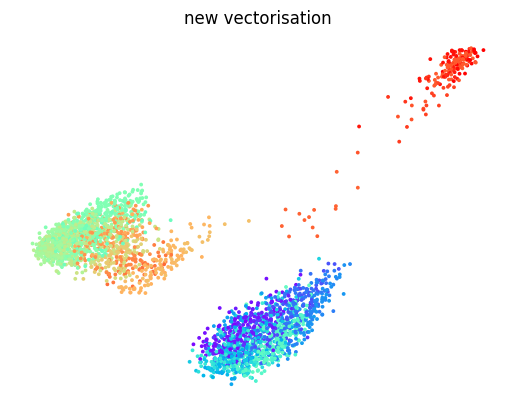

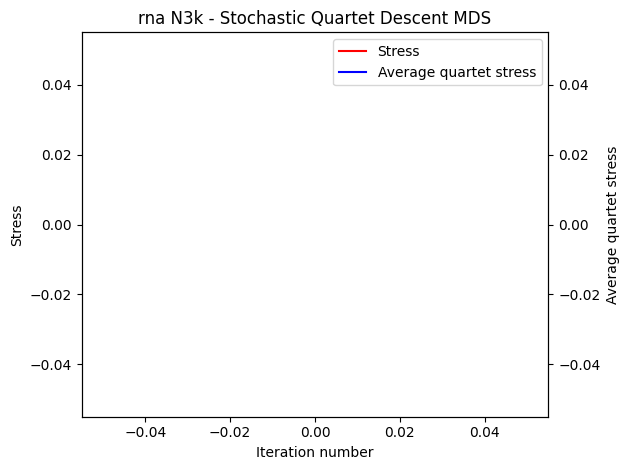

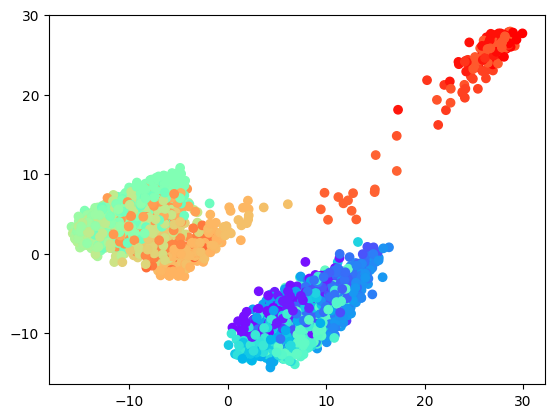

In [3]:
show_layouts(layout, use_labels=True, color_map='rainbow', title="new vectorisation")
show_generation_metrics(layout, quartet_stress=True)

fig, axis = plt.subplots()
axis.scatter(Xld[:,0], Xld[:,1], c=dataset.labels, cmap='rainbow')
